<a href="https://colab.research.google.com/github/Vite-Noiz/Machine-Learning-Course/blob/main/Regression/TA-vid-simple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# google colab environment -> how to create it
# chnage the name
# It uses gemini if you use vpn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## From scratch

### 1D

Define input

In [ ]:
# copy ceate code and plot 1 by 1

In [ ]:
from sklearn.model_selection import train_test_split

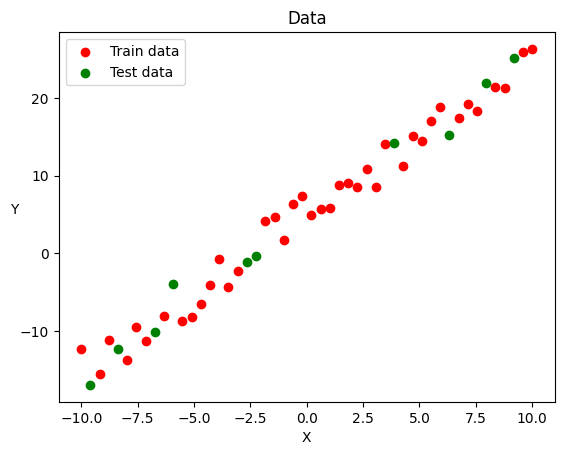

In [ ]:
X = np.linspace(-10,10,50)
y = 2*X + 2

# creating noise
noise = np.random.rand(len(y),)*6

# add noise to output
y += noise


# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle = True,
    random_state = 69
)


plt.scatter(X_train,y_train, c = 'red', label='Train data')

plt.scatter(X_test,y_test, c = 'green', label='Test data')

plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.legend()


Train a simple linear regression

In [ ]:
# run a simple example and then plot the output line and then come back and fix every thing

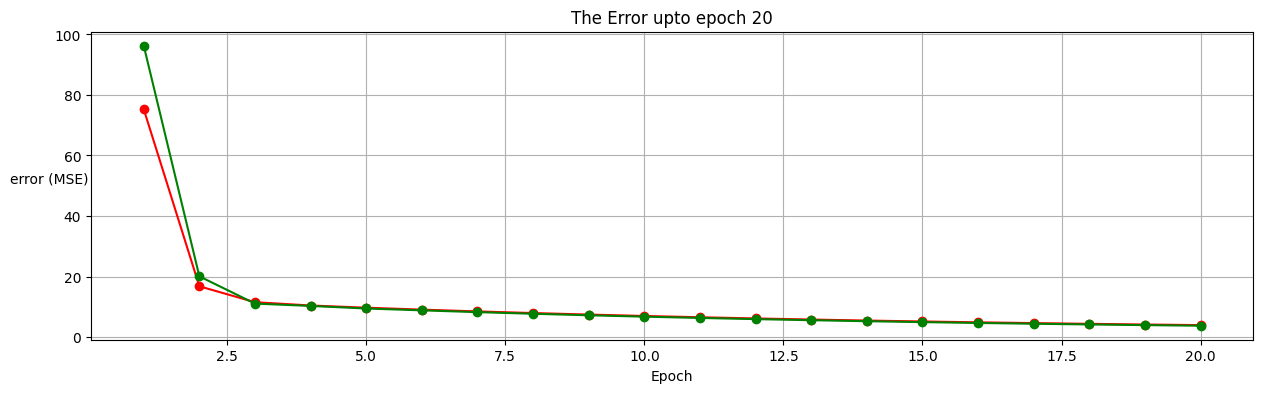

In [ ]:
# input parameters
N_FEATURES = 1
LEARNING_RATE = 0.001
cost_list = []
cost_list_test = []
w_hist = []
b_hist = []
dj_hist = []

# initialization
np.random.seed(69)
w = np.random.rand(1,N_FEATURES)*2 - 0.5
np.random.seed(69)
b = np.random.rand(1)*2 - 0.5

for i in range(20):

    w_hist.append(w)
    b_hist.append(b)

    # Clearing any output to show the error graph
    # clear_output(wait=True)

    # creating an empty array for yhat
    y_hat = np.zeros((y_train.shape[0],))
    y_hat_test = np.zeros((y_test.shape[0],))

    # Forward
    for d in range(y_hat.shape[0]):

        x = X_train[d]
        Z = np.dot(w,x) + b
        y_hat[d] = Z


    # Error
    # write J = 1/(2N) sum((y_hat - y)^2)
    E = y_train-y_hat
    e = 1/2 * np.dot(E,E)
    e *= 1/(len(y_train))
    cost_list.append(e)

    # Test forward
    for d in range(y_hat_test.shape[0]):

        x = X_test[d]
        Z = np.dot(w,x) + b
        y_hat_test[d] = Z

    # Test error
    E_test = y_test - y_hat_test
    e_test = 1/2 * np.dot(E_test,E_test)
    e_test *= 1/len(y_test)
    cost_list_test.append(e_test)

    # Update rule
    # w := w - eta * dj/dw = w - eta * sum[(y_hat - y)x]  = w + eta * sum[(y - y_hat)x]
    dj = np.dot(X_train.T,E)
    dj_hist.append(dj)
    w = w + LEARNING_RATE*dj
    b = b + LEARNING_RATE*np.sum(E)

# Plot error
plt.figure(figsize=(15,4))
plt.plot(list(range(1,len(cost_list)+1)),cost_list,
            marker='o',
            markerfacecolor = 'red',
            color = 'red')

plt.plot(list(range(1,len(cost_list_test)+1)),cost_list_test,
            marker='o',
            markerfacecolor = 'green',
            color = 'green')
plt.title(f'The Error upto epoch {i+1}')
plt.ylabel('error (MSE)', rotation=0)
plt.xlabel('Epoch')
# plt.xlim([0,100])
plt.grid()
plt.show()

b_hist = np.array(b_hist)
w_hist = np.array(w_hist)
cost_arr = np.array(cost_list)


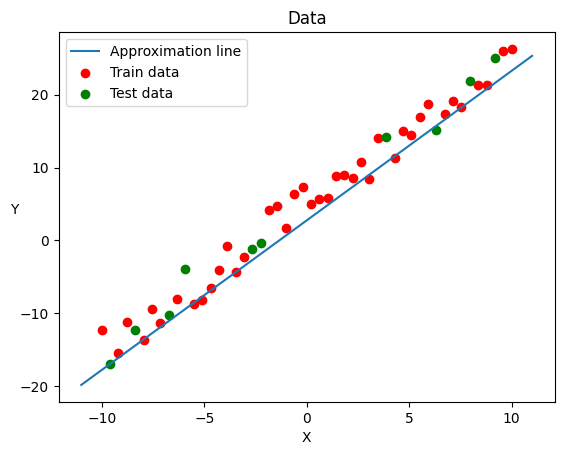

In [ ]:
t = np.linspace(-11, 11, 3)
plt.plot(
    t,
    (t*w + b).reshape(-1,),
    label = 'Approximation line'
)

plt.scatter(
    X_train,y_train,
    c = 'red',
    label='Train data'
)

plt.scatter(
    X_test,y_test,
    c = 'green',
    label='Test data'
)

plt.title('Data')
plt.xlabel('X')
plt.ylabel('Y', rotation = 0)
plt.legend()

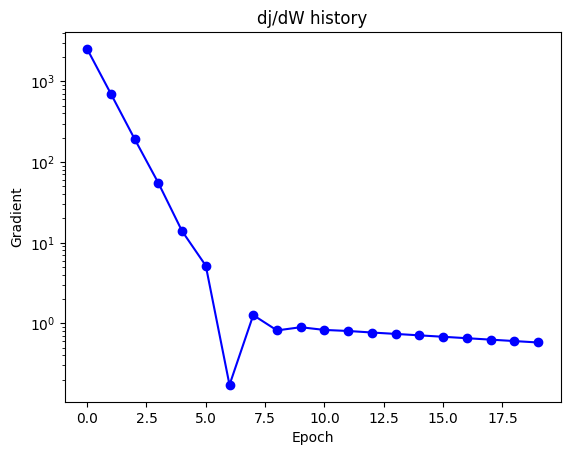

In [ ]:
plt.plot(np.abs(dj_hist), '-o', color='blue')
plt.title('dj/dW history')
plt.xlabel('Epoch')
plt.ylabel('Gradient')
plt.yscale('log')

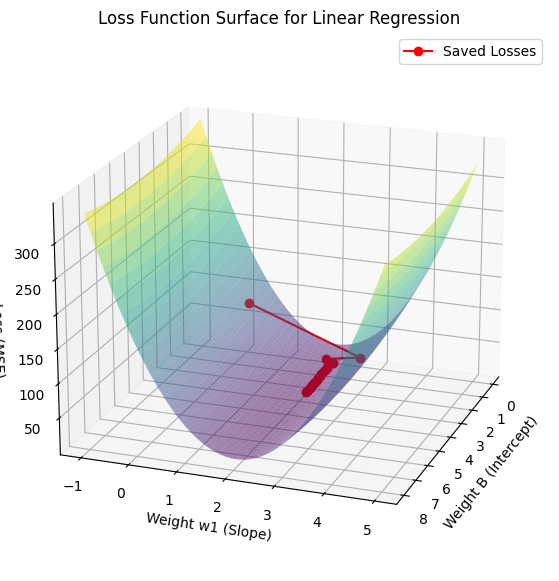

In [ ]:
# Create a grid of B and w1 values
b_values = np.linspace(0, 8, 100)
W_values = np.linspace(-1, 5, 100)
B, W = np.meshgrid(b_values, W_values)


# Compute the loss for each pair of (B, w1)
loss_values = np.zeros(B.shape)
for i in range(B.shape[0]):
    for j in range(B.shape[1]):

        predictions = B[i, j] + W[i, j] * X
        loss = np.mean((predictions - y) ** 2)
        loss_values[i, j] = loss

# Plotting the surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(B, W, loss_values, cmap='viridis', edgecolor='none', alpha = 0.5)

# Scatter the saved weights and losses
# ax.scatter(b_hist, W_hist, cost_list, color='red', s=50, label='Saved Losses', alpha = 1)
ax.plot(b_hist.ravel(), w_hist.ravel(), cost_arr.ravel(), '-o', color='red', label='Saved Losses')
ax.set_xlabel('Weight B (Intercept)')
ax.set_ylabel('Weight w1 (Slope)')
ax.set_zlabel('Loss (MSE)')
ax.set_title('Loss Function Surface for Linear Regression')
ax.legend()

# Rotate the view around Z axis by 90 degrees
ax.view_init(elev=20, azim=20)

plt.show()

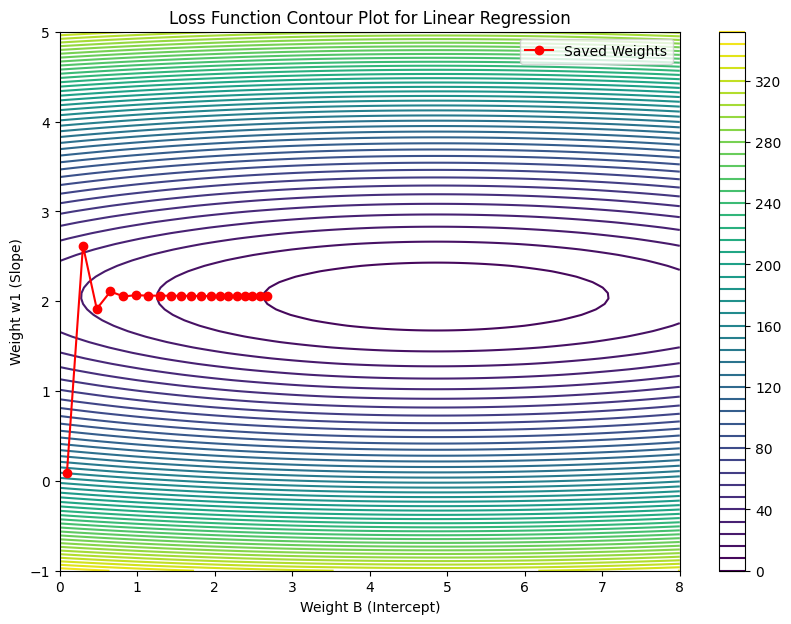

In [ ]:
# Create a grid of B and w1 values
b_values = np.linspace(0, 8, 100)
W_values = np.linspace(-1, 5, 100)
B, W = np.meshgrid(b_values, W_values)

# Compute the loss for each pair of (B, w1)
loss_values = np.zeros(B.shape)
for i in range(B.shape[0]):
    for j in range(B.shape[1]):
        predictions = B[i, j] + W[i, j] * X
        loss = np.mean((predictions - y) ** 2)
        loss_values[i, j] = loss

# Plotting the contours
plt.figure(figsize=(10, 7))
contour = plt.contour(B, W, loss_values, levels=50, cmap='viridis')  # Use contour for lines or contourf for filled
plt.colorbar(contour)  # Add a colorbar to indicate the values of the loss function

b_hist = np.array(b_hist)
W_hist = np.array(w_hist)
# Scatter the saved weights and losses on the contour plot
# plt.scatter(b_hist, W_hist, color='red', s=50, label='Saved Weights', alpha=1)
plt.plot(b_hist.ravel(), W_hist.ravel(),'-o' , color='red',  label='Saved Weights')
plt.xlabel('Weight B (Intercept)')
plt.ylabel('Weight w1 (Slope)')
plt.title('Loss Function Contour Plot for Linear Regression')
# plt.ylim([1,3])
plt.legend()

plt.show()


### 2D

In [ ]:
X =  np.zeros(shape = (100,5))
for i in range(5):

    X[:,i] = np.linspace(i*(-10),i*10, 100) + i**2

y = X[:,0] + 2*X[:,1] - 4*X[:,2] + 1.5*X[:,3] + 0.4*X[:,4]

# create noise
noise = np.random.rand(y.shape[0],)

# add noise to y
y += noise

# split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    shuffle = True,
    random_state = 69
)


Train a simple linear regression

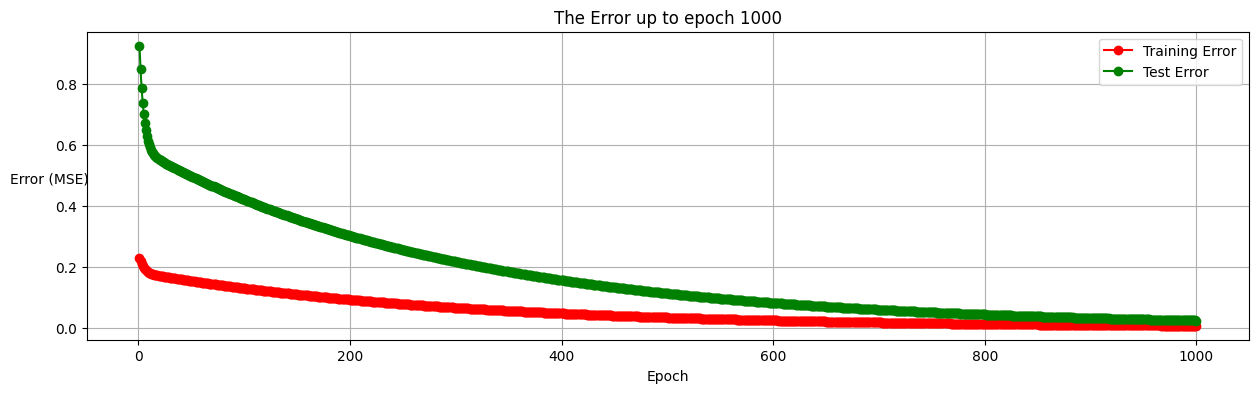

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Input parameters
N_FEATURES = 5
LEARNING_RATE = 0.0001
cost_list = []
cost_list_test = []

# Initialization
np.random.seed(69)
W = np.random.rand(1, N_FEATURES) / 10 - 0.5 / 10
b = np.random.rand(1) / 10 - 0.5 / 10

# Training loop
for i in range(1000):
    # Forward pass for training
    y_hat = np.dot(X_train, W.T) + b  # Vectorized calculation

    # Error calculation
    E = y_train - y_hat.flatten()
    e = 0.5 * np.dot(E, E) / len(y_train)
    e *= 1/y_train.shape[0]
    cost_list.append(e)

    # Forward pass for testing
    y_hat_test = np.dot(X_test, W.T) + b  # Vectorized calculation

    # Test error calculation
    E_test = y_test - y_hat_test.flatten()
    e_test = 0.5 * np.dot(E_test, E_test) / len(y_test)
    e_test *= 1/y_test.shape[0]
    cost_list_test.append(e_test)

    # Update rule
    dj = np.dot(X_train.T, E) / len(y_train)  # Average gradient
    W += LEARNING_RATE * dj.T  # Update weights
    b += LEARNING_RATE * np.sum(E) / len(y_train)  # Update bias

# Plot error
plt.figure(figsize=(15, 4))
plt.plot(range(1, len(cost_list) + 1), cost_list, marker='o', markerfacecolor='red', color='red', label='Training Error')
plt.plot(range(1, len(cost_list_test) + 1), cost_list_test, marker='o', markerfacecolor='green', color='green', label='Test Error')
plt.title(f'The Error up to epoch {i + 1}')
plt.ylabel('Error (MSE)', rotation=0)
plt.xlabel('Epoch')
plt.grid()
plt.legend()
plt.show()



# New data

## Kaggle

In [ ]:
!kaggle datasets download camnugent/california-housing-prices

Dataset URL: https://www.kaggle.com/datasets/camnugent/california-housing-prices
License(s): CC0-1.0
  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 103MB/s]


In [ ]:
! unzip /content/california-housing-prices.zip -d /content/

Archive:  /content/california-housing-prices.zip
  inflating: /content/housing.csv    


## Load .csv file

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/housing.csv')
df.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [ ]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
df.ocean_proximity[2],  df.ocean_proximity.unique(), df.ocean_proximity.value_counts()

('NEAR BAY',
 array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
       dtype=object),
 ocean_proximity
 <1H OCEAN     9136
 INLAND        6551
 NEAR OCEAN    2658
 NEAR BAY      2290
 ISLAND           5
 Name: count, dtype: int64)

In [ ]:
df.ocean_proximity.values

array(['NEAR BAY', 'NEAR BAY', 'NEAR BAY', ..., 'INLAND', 'INLAND',
       'INLAND'], dtype=object)

In [ ]:
df.isna().any()
df.dropna(axis=0, inplace=True)

In [ ]:
df['ocean_proximity'] = df.ocean_proximity.replace(df.ocean_proximity.unique(), list(range(5)))

In [ ]:
df.ocean_proximity.unique()

array([0, 1, 2, 3, 4])

<Axes: >

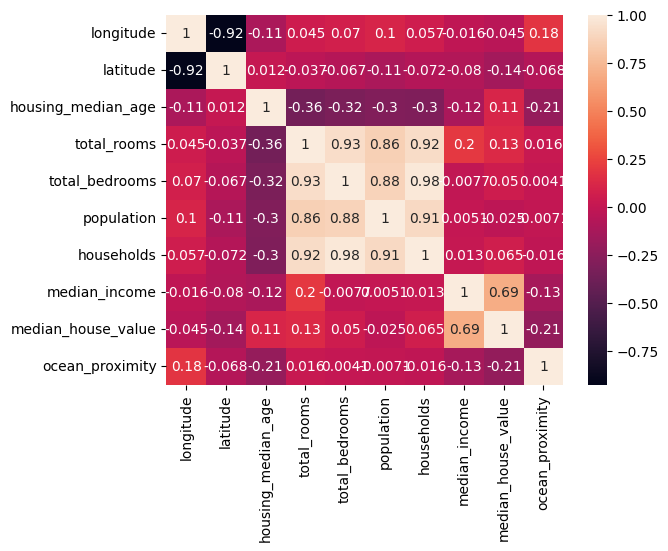

In [ ]:
C = df.corr()
sns.heatmap(C, annot=True)


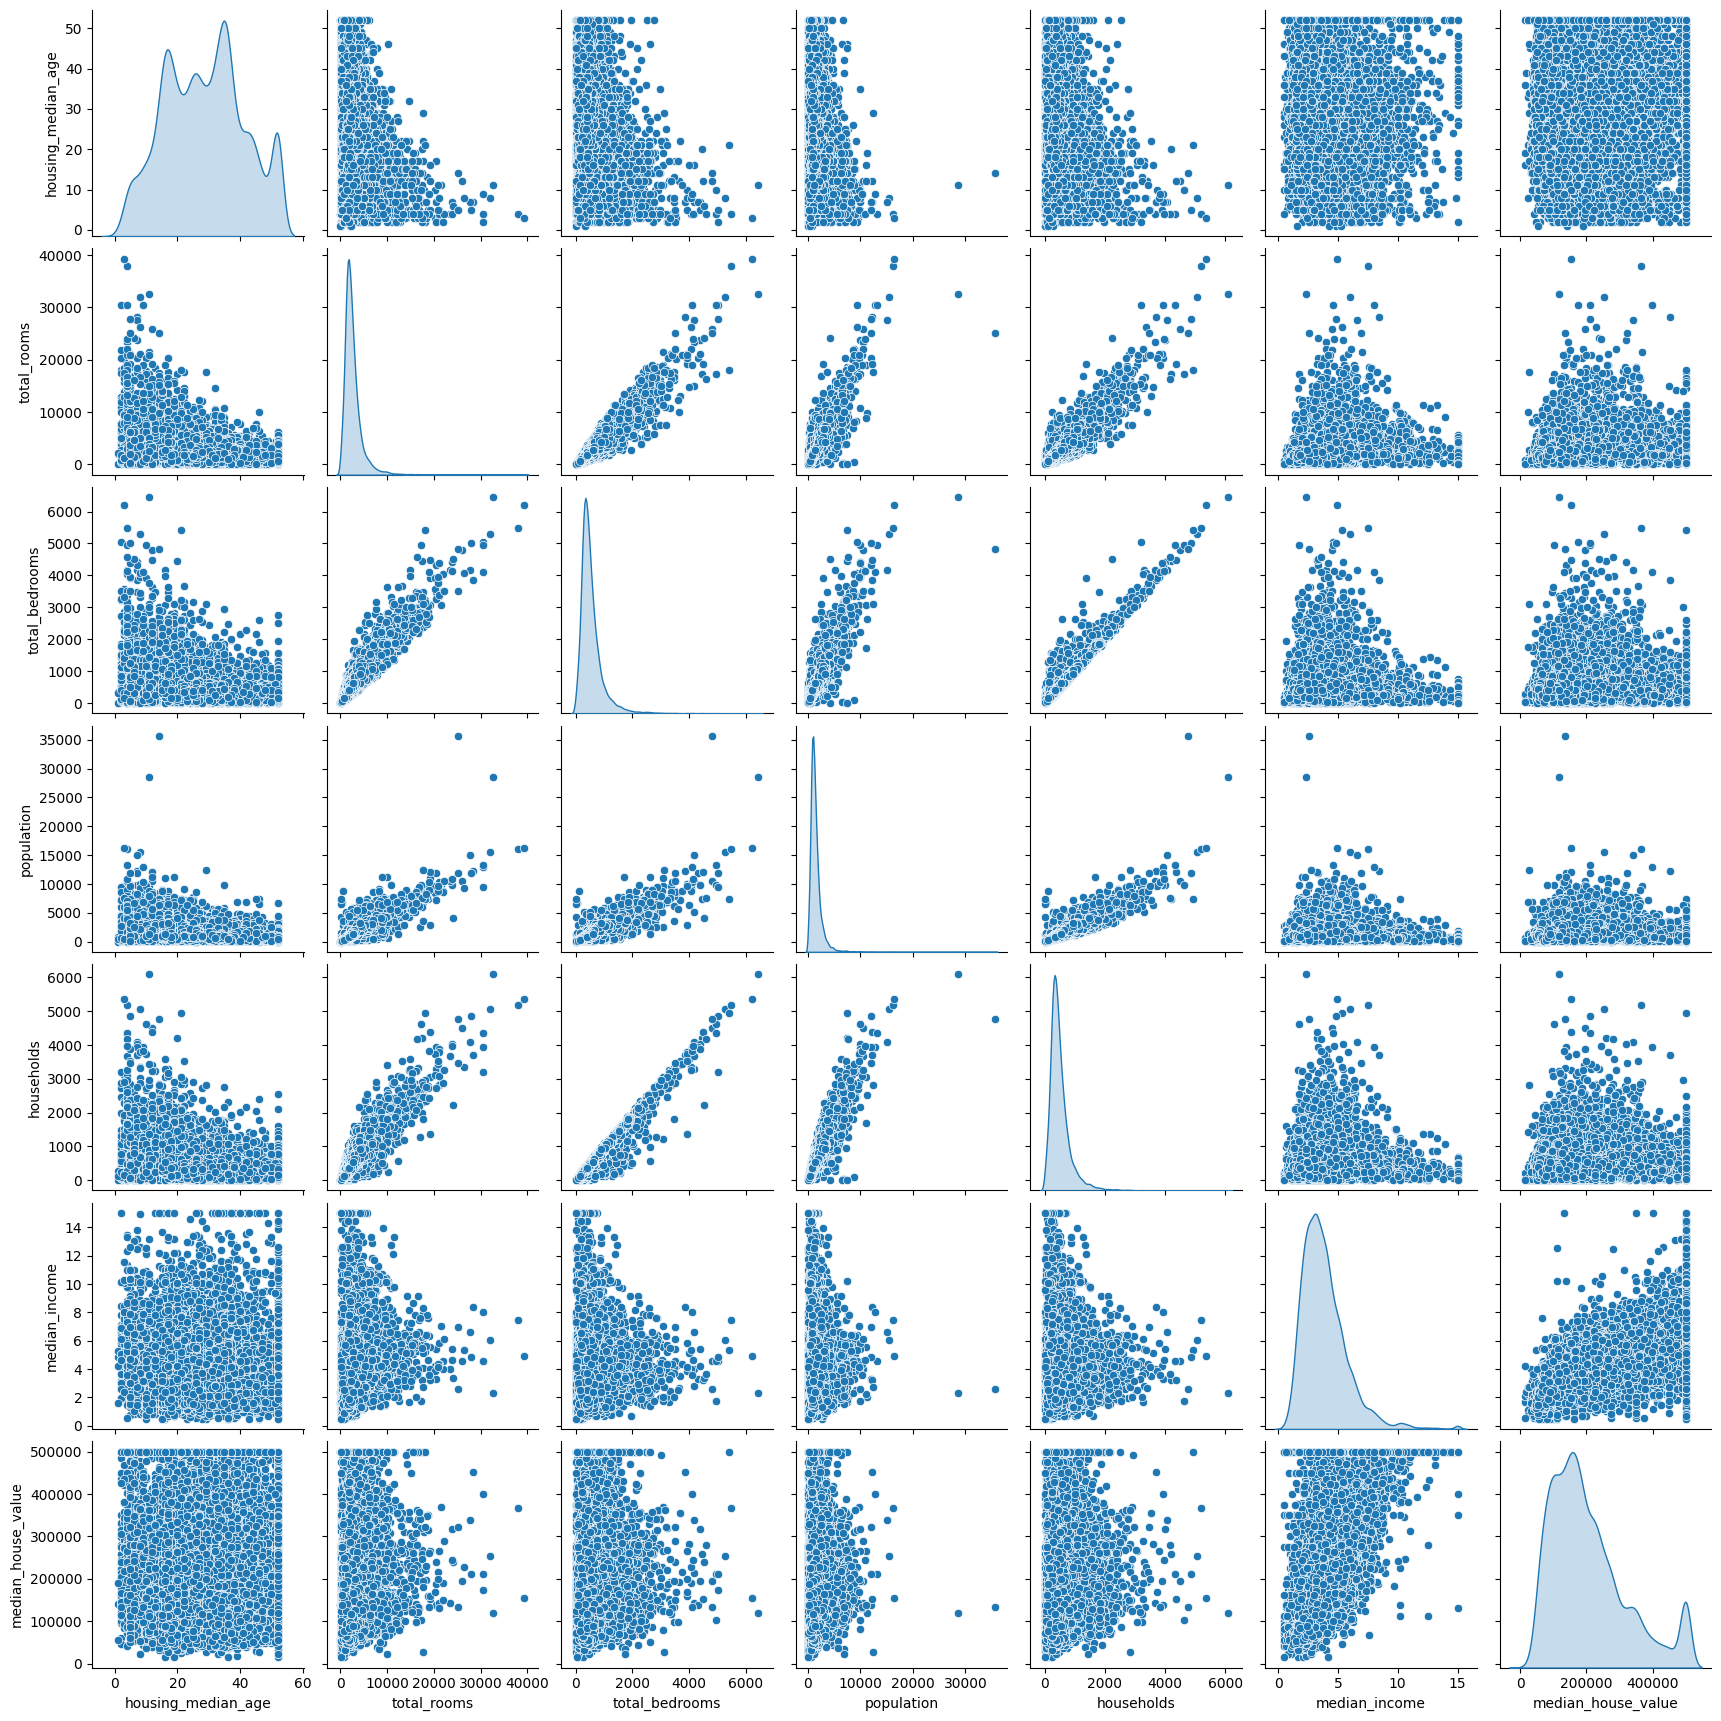

In [ ]:
sns.pairplot(
    df,
    vars = ['housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
    diag_kind='kde'
)

## Preprocessing

In [ ]:
X = df.drop(columns = ['median_house_value']).values
y = df.median_house_value.values

print(f'Shape of input data is {X.shape}')
print(f'Shape of output data is {y.shape}')

Shape of input data is (20433, 9)
Shape of output data is (20433,)


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.1,
    shuffle = True,
    random_state = 69
)
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train,
    test_size=0.111,
    shuffle = True,
    random_state = 69
)

print(f'Shape of train data is {x_train.shape}')
print(f'Shape of test data is {x_test.shape}')
print(f'Shape of validation data is {x_val.shape}')

Shape of train data is (16347, 9)
Shape of test data is (2044, 9)
Shape of validation data is (2042, 9)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train)


x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)


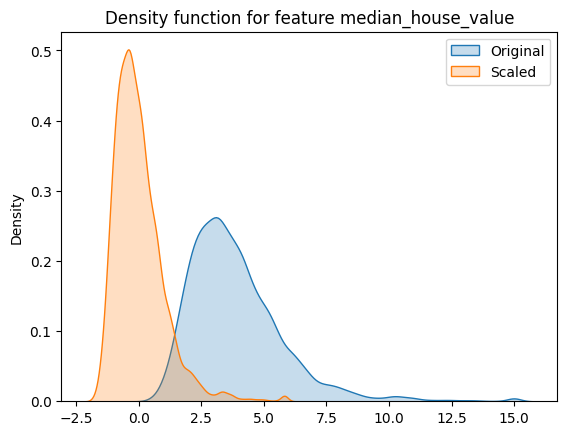

In [ ]:
sns.kdeplot(x_train[:,-2], fill=True)
sns.kdeplot(x_train_scaled[:,-2], fill=True)

plt.title(f'Density function for feature {df.columns[-2]}')
plt.legend(['Original', 'Scaled'])

## Model trainning

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
y_hat_test = lr.predict(x_test)
y_hat_train = lr.predict(x_train)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
# Calculate R2 score for training data
mse_train = mean_squared_error(y_train, y_hat_train)

# Calculate R2 score for testing data
mse_test = mean_squared_error(y_test, y_hat_test)

print(f"R2 score for training data:{mse_train}")
print(f"R2 score for testing data: {mse_test}")

R2 score for training data:7346943584927485.0
R2 score for testing data: 7995491648817402.0
